In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Credit_card.csv')
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [3]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [5]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [6]:
df.drop(['Ind_ID', 'Type_Occupation', 'Birthday_count', 'Employed_days'], axis=1, inplace=True)

In [7]:
cat_col=[]
num_col=[]

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)
    else:    
            num_col.append(col)
        

In [9]:
df.isnull().sum()

GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Family_Members     0
label              0
dtype: int64

In [10]:
for col in cat_col:
    print(f'{col} :',df[col].unique())

GENDER : ['M' 'F' nan]
Car_Owner : ['Y' 'N']
Propert_Owner : ['Y' 'N']
Type_Income : ['Pensioner' 'Commercial associate' 'Working' 'State servant']
EDUCATION : ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Marital_status : ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Housing_type : ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']


In [11]:
for col in cat_col:
    df[col].fillna('unknown', inplace=True)

In [12]:
for col in num_col:
    df[col].fillna(0, inplace=True)

In [13]:
df.isnull().sum()

GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

### Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = {}

In [16]:
for col in cat_col:
    label_encoder[col] = LabelEncoder()
    df[col]= label_encoder[col].fit_transform(df[col])

In [17]:
label_encoder

{'GENDER': LabelEncoder(),
 'Car_Owner': LabelEncoder(),
 'Propert_Owner': LabelEncoder(),
 'Type_Income': LabelEncoder(),
 'EDUCATION': LabelEncoder(),
 'Marital_status': LabelEncoder(),
 'Housing_type': LabelEncoder()}

### Data Visualization

C:\Users\AHMAD RUFAI AHMAD\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: module 'matplotlib' has no attribute 'show'

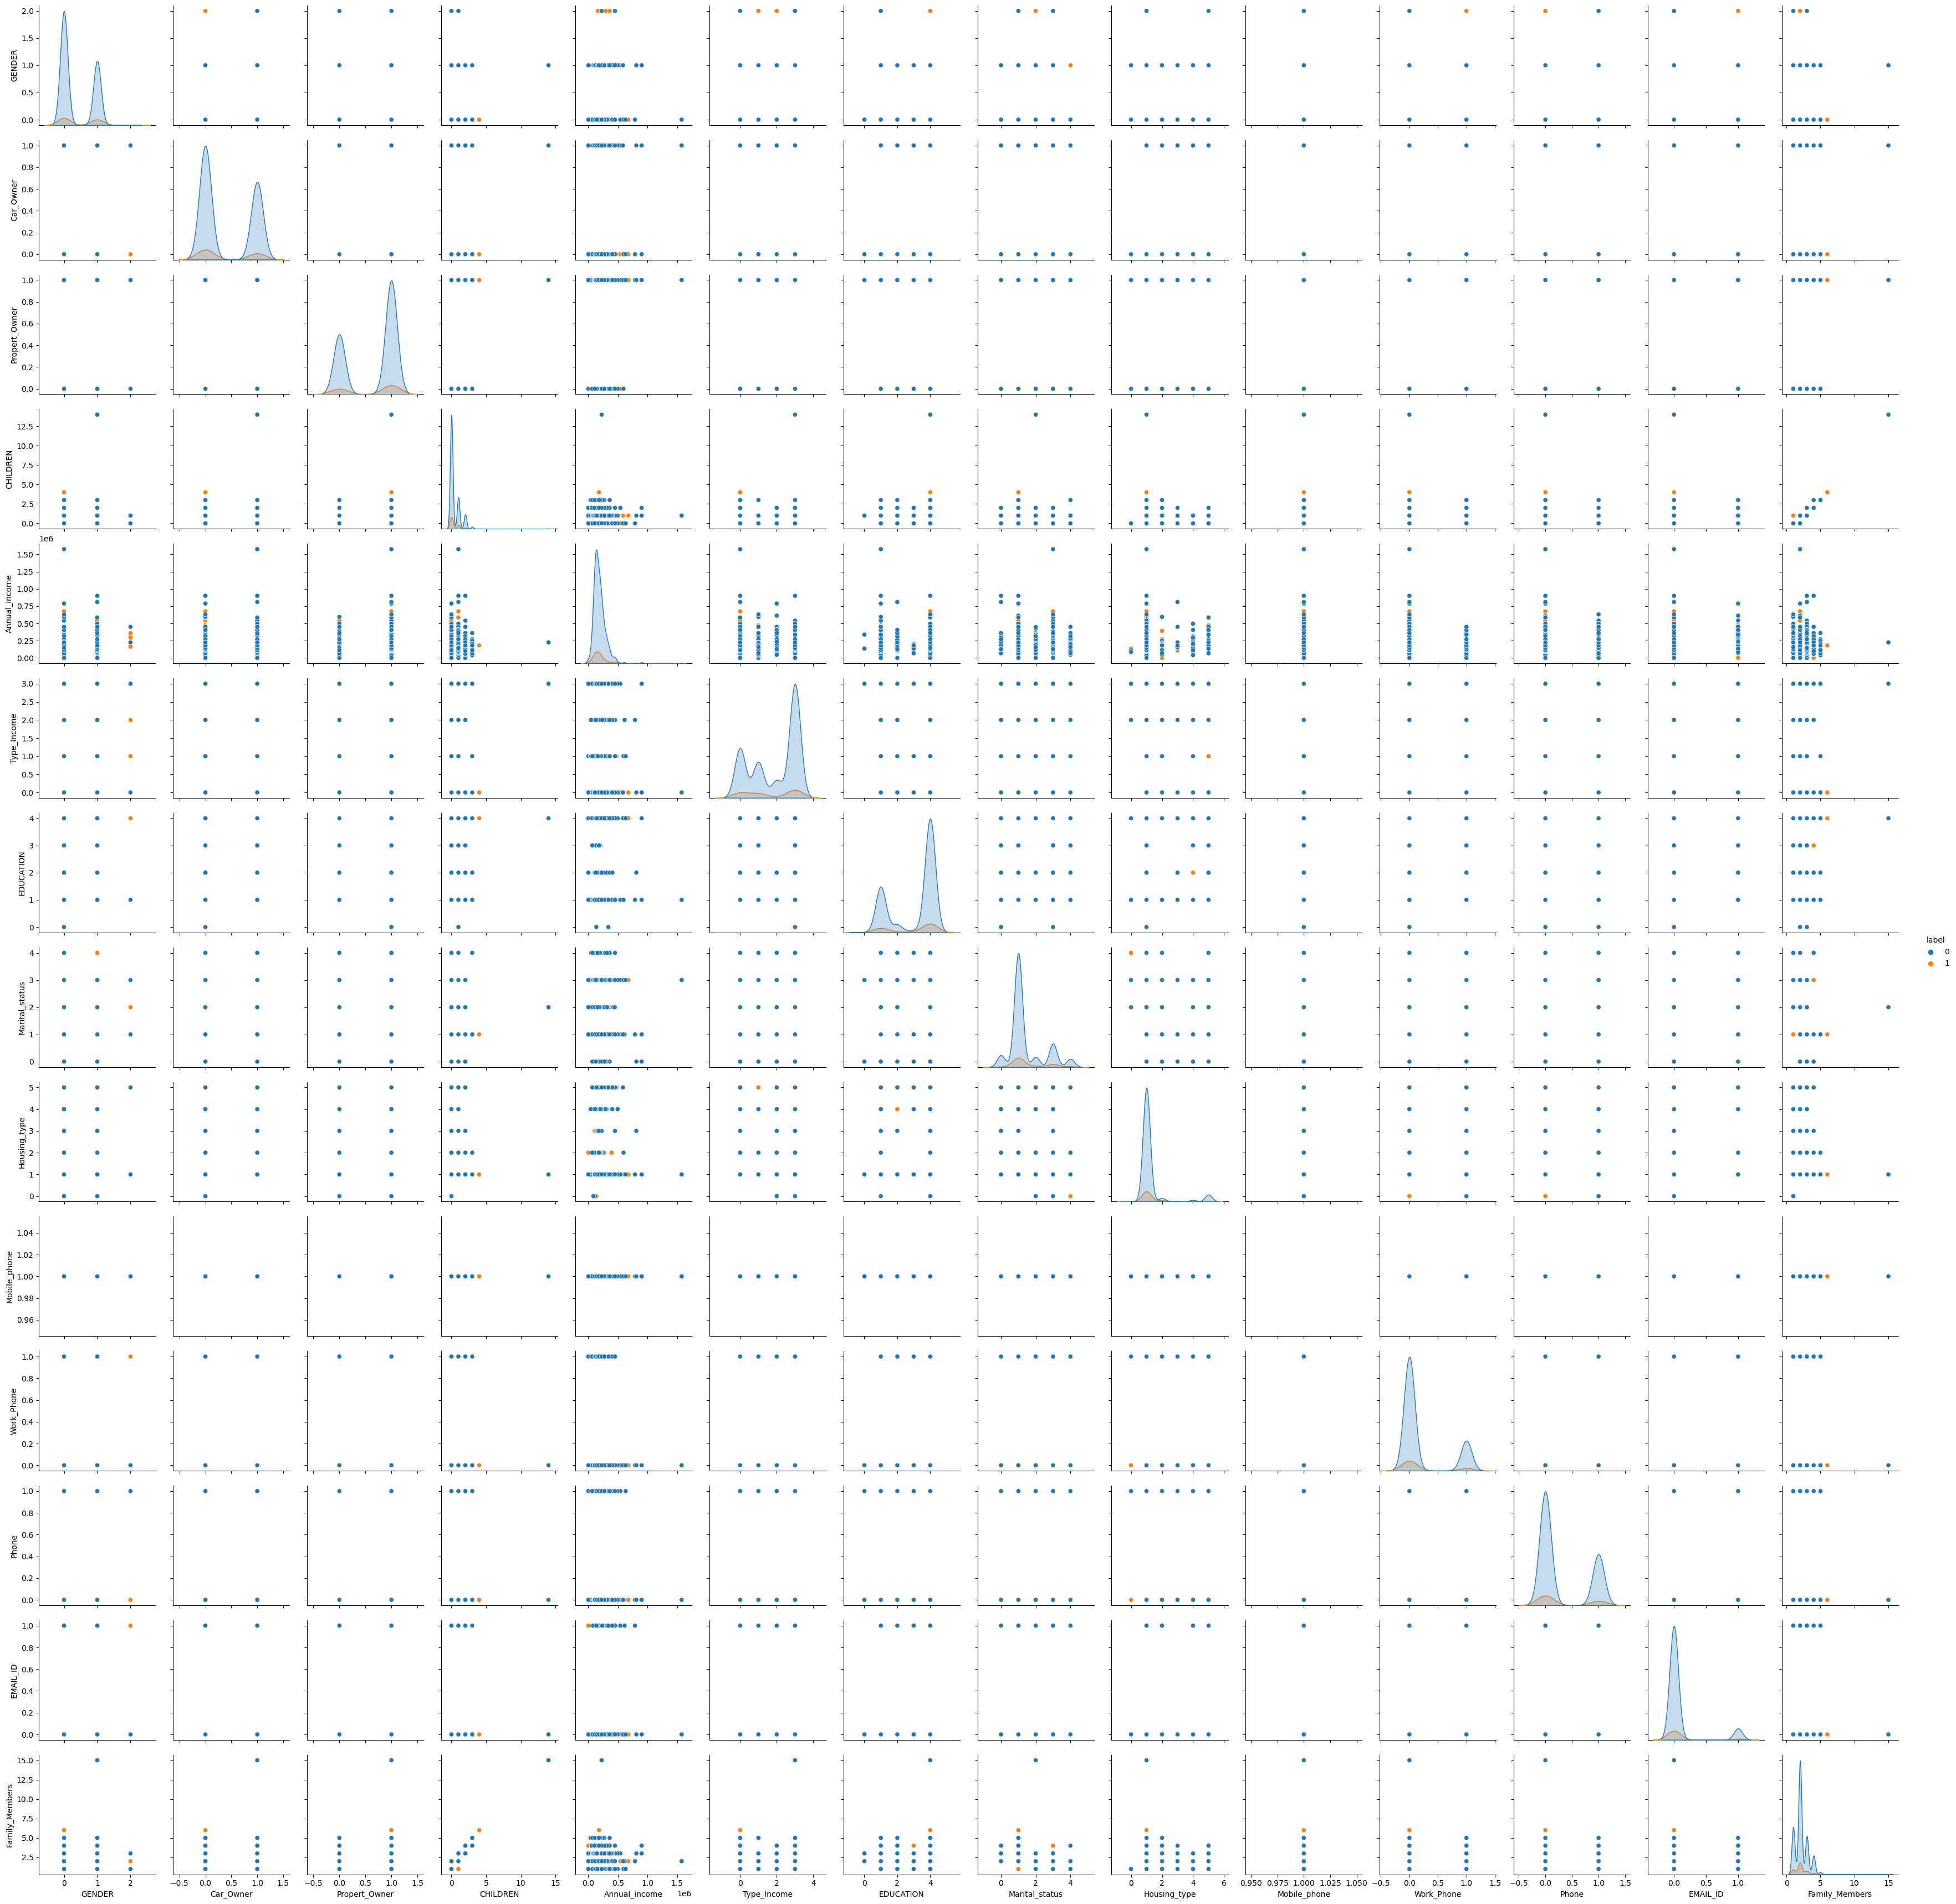

In [18]:
sns. pairplot(df, hue='label')
plt.show()

In [19]:
df.drop(['Mobile_phone'], axis=1, inplace=True)

AttributeError: module 'matplotlib' has no attribute 'show'

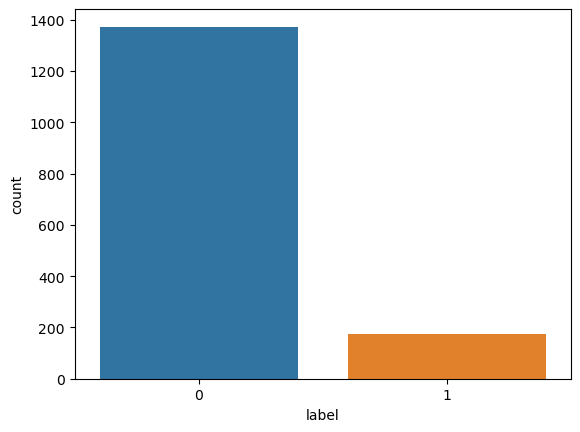

In [20]:
sns.countplot(data=df, x='label')
plt.show()

### Train & Test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df.iloc[:,:-1]
x

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members
0,1,1,1,0,180000.0,1,1,1,1,0,0,0,2
1,0,1,0,0,315000.0,0,1,1,1,1,1,0,2
2,0,1,0,0,315000.0,0,1,1,1,1,1,0,2
3,0,1,0,0,0.0,0,1,1,1,1,1,0,2
4,0,1,0,0,315000.0,0,1,1,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,1,0,0.0,0,1,1,1,0,0,0,2
1544,0,0,0,0,225000.0,0,2,3,1,0,0,0,1
1545,1,1,1,2,180000.0,3,1,1,1,0,0,0,4
1546,1,1,0,0,270000.0,3,4,0,1,1,1,0,2


In [23]:
y = df['label']
y

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1548, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RNF = RandomForestClassifier()

In [30]:
RNF.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
y_hat = RNF. predict(x_test)

### Model Evaluation

In [32]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [33]:
accuracy_score(y_test, y_hat)

0.896774193548387

In [34]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       280
           1       0.44      0.27      0.33        30

    accuracy                           0.90       310
   macro avg       0.68      0.62      0.64       310
weighted avg       0.88      0.90      0.88       310



AttributeError: module 'matplotlib' has no attribute 'show'

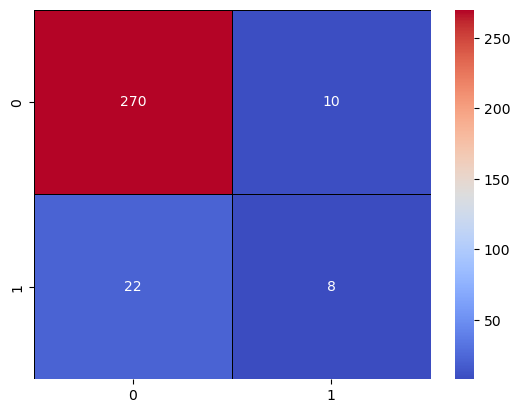

In [35]:
sns.heatmap(confusion_matrix(y_test, y_hat), cmap='coolwarm', fmt='.3g', annot=True, linecolor='black', linewidths=0.5)
plt.show()